In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter

In [28]:
df = pd.read_csv("./data/input/netflix_titles.csv")
print ("Data has {} rows and {} columns".format(df.shape[0], df.shape[1]))
df.head(3)

Data has 6234 rows and 12 columns


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


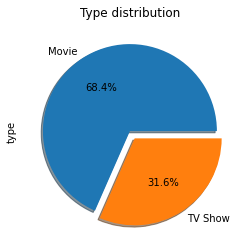

In [3]:
# type distribution
ax = df.type.value_counts().plot(
    kind = 'pie', 
    title = 'Type distribution',
    autopct='%1.1f%%', 
    shadow=True, 
    explode=(0, 0.1)
)

<AxesSubplot:title={'center':'Rating Distribution'}>

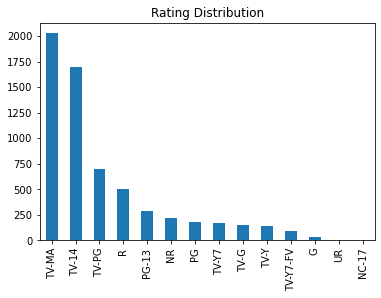

In [4]:
# rating distribution
df.rating.value_counts().sort_values(ascending = False).plot(
    kind = 'bar', 
    title = 'Rating Distribution'
)

Note: # represents null value


Text(0, 0.5, 'Count')

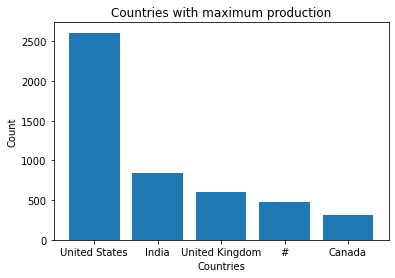

In [5]:
# Countries with maximum production 
df.country.fillna('#', inplace = True)
df['country_edit'] = df.country.apply(lambda x: x.split(', '))
dict_country = Counter(list(chain.from_iterable(df.country_edit)))
x = dict_country.most_common(5)
d = {i[0]: i[1] for i in x}
print ("Note: # represents null value")
plt.bar(d.keys(), d.values())
plt.title("Countries with maximum production")
plt.xlabel("Countries")
plt.ylabel("Count")

Note: # represents null


Text(0, 0.5, 'Count')

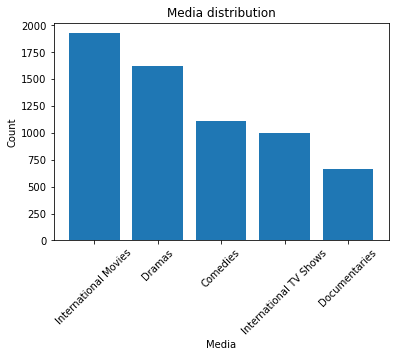

In [6]:
# media distribution
if df.listed_in.isna().any():
    df.listed_in.fillna('#', inplace = True)

df['listed_in_edit'] = df.listed_in.apply(lambda x: x.split(', '))
dict_genre = Counter(list(chain.from_iterable(df.listed_in_edit)))
x = dict_genre.most_common(5)
d = {i[0]: i[1] for i in x}
print ('Note: # represents null')
plt.xticks(rotation = 45)
plt.bar(d.keys(), d.values())
plt.title("Media distribution")
plt.xlabel("Media")
plt.ylabel("Count")

In [7]:
# duration
def clean_duration(x):
    if 'Season' in x:
        return int(x.split()[0])*60
    return int(x.split()[0])
    
df['duration_edit'] = df.duration.apply(clean_duration)

type
Movie      AxesSubplot(0.125,0.125;0.775x0.755)
TV Show    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration_edit, dtype: object

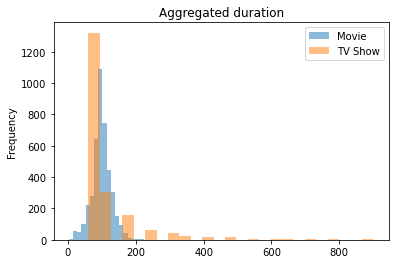

In [8]:
df.groupby(by = 'type')['duration_edit'].plot(
    kind = 'hist', 
    alpha = 0.5, 
    bins = 25, 
    legend = True,
    title = 'Aggregated duration'
)

In [9]:
# increase over year
df['date_added'] = pd.to_datetime(df.date_added)
df['year_edit'] = df.date_added.apply(lambda x: x.year)
df.year_edit.fillna('2014', inplace = True)

In [10]:
df['year_edit'] = df.year_edit.astype(int)

<AxesSubplot:ylabel='Frequency'>

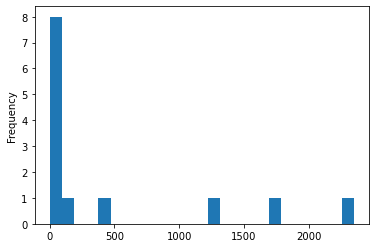

In [11]:
df.groupby(by = 'year_edit')['show_id'].count().plot(kind = 'hist', bins = 25)

In [15]:
genres = set(chain.from_iterable(df.listed_in_edit))

In [18]:
genres

{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers'}

# making file

In [30]:
df = df[df.type == 'Movie'].reset_index(drop = True)

In [65]:
df.director.fillna('', inplace = True)

In [66]:
def removeNonAscii(s): return "".join(i for i in s if ord(i)<128)

In [68]:
df.director.apply(removeNonAscii)

0              Richard Finn, Tim Maltby
1                                      
2                      Fernando Lebrija
3                             Gabe Ibez
4       Rodrigo Toro, Francisco Schultz
                     ...               
4260                   G.J. Echternkamp
4261                   G.J. Echternkamp
4262                     Zatella Beatty
4263                         Vlad Yudin
4264                                   
Name: director, Length: 4265, dtype: object

In [60]:
df['rating'] = df.rating.astype('category')
{i: j for i, j in enumerate(df.rating.cat.categories)}   

{0: 'G',
 1: 'NC-17',
 2: 'NR',
 3: 'PG',
 4: 'PG-13',
 5: 'R',
 6: 'TV-14',
 7: 'TV-G',
 8: 'TV-MA',
 9: 'TV-PG',
 10: 'TV-Y',
 11: 'TV-Y7',
 12: 'TV-Y7-FV',
 13: 'UR'}

In [47]:
sum(df.rating.isna())

8

In [44]:
sum(df.country.isna()) < 0.05*len(df)

True

In [41]:
df['director'].isna()

0       False
1        True
2       False
3       False
4       False
        ...  
4260    False
4261    False
4262    False
4263    False
4264     True
Name: director, Length: 4265, dtype: bool

In [33]:
df.duration.isna().any()

False

In [69]:
df['desc_len'] = df.description.apply(lambda x: len(x.split()))

<AxesSubplot:ylabel='Frequency'>

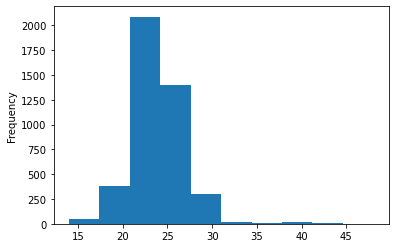

In [71]:
df.desc_len.plot(kind = 'hist')

In [80]:
df_clean = pd.read_csv("./data/output/clean_data.csv")

In [89]:
genre = []
for i in df.listed_in:
    for j in str(i).split(", "):
        genre.append(j)

In [129]:
Counter(genre)

Counter({'Children & Family Movies': 378,
         'Comedies': 1113,
         'Stand-Up Comedy': 281,
         'International Movies': 1927,
         'Sci-Fi & Fantasy': 193,
         'Thrillers': 392,
         'Action & Adventure': 597,
         'Dramas': 1623,
         'Cult Movies': 55,
         'Independent Movies': 552,
         'Romantic Movies': 376,
         'Documentaries': 668,
         'Horror Movies': 262,
         'Music & Musicals': 243,
         'Anime Features': 45,
         'Faith & Spirituality': 47,
         'LGBTQ Movies': 60,
         'Movies': 56,
         'Classic Movies': 84,
         'Sports Movies': 157})

In [94]:
len(Counter(genre).keys())

20

In [128]:
country = []
for i in df_clean.country:
    for j in str(i).split(", "):
        country.append(j)
country_d = Counter(country)
len(country_d.keys())

271

In [101]:
from sklearn.preprocessing import MultiLabelBinarizer

In [120]:
df['new_l'] = df.listed_in.apply(lambda x: list(x.split(", ")))

In [121]:
l = MultiLabelBinarizer()

In [122]:
o = l.fit_transform(df.new_l)

In [123]:
o.shape

(4265, 20)

In [126]:
res = pd.DataFrame(
    l.fit_transform(df.new_l),
    columns = l.classes_)

In [127]:
res

,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4261,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4262,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4263,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
l.fit(df_clean.listed_in)

LabelBinarizer()

In [100]:
l.classes_

array(["['Action & Adventure', 'Anime Features', 'Children & Family Movies']",
       "['Action & Adventure', 'Anime Features', 'Classic Movies']",
       "['Action & Adventure', 'Anime Features', 'Horror Movies']",
       "['Action & Adventure', 'Anime Features', 'International Movies']",
       "['Action & Adventure', 'Anime Features', 'Sci-Fi & Fantasy']",
       "['Action & Adventure', 'Children & Family Movies', 'Classic Movies']",
       "['Action & Adventure', 'Children & Family Movies', 'Comedies']",
       "['Action & Adventure', 'Children & Family Movies', 'Dramas']",
       "['Action & Adventure', 'Children & Family Movies', 'Independent Movies']",
       "['Action & Adventure', 'Children & Family Movies', 'Sci-Fi & Fantasy']",
       "['Action & Adventure', 'Children & Family Movies']",
       "['Action & Adventure', 'Classic Movies', 'Comedies']",
       "['Action & Adventure', 'Classic Movies', 'Cult Movies']",
       "['Action & Adventure', 'Classic Movies', 'Dramas']",
